# CALIDAD DE DATOS Y CREACION DATAMART ANALITICO

## SET UP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Automcompletar rápido
%config IPCompleter.greedy=True

## CARGA DE DATOS

Este caso se compone de 4 ficheros:

* Planta 1, datos de generación
* Planta 1, datos de sensor ambiental
* Planta 2, datos de generación
* Planta 2, datos de sensor ambiental

### Carga de datos planta 1 - datos de generación

In [2]:
p1g = pd.read_csv('../Datos/Plant_1_Generation_Data.csv')
p1g

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


### Carga de datos planta 1 - datos de sensor ambiental

In [3]:
p1w = pd.read_csv('../Datos/Plant_1_Weather_Sensor_Data.csv')
p1w

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


### Carga de datos planta 2 - datos de generación

In [4]:
p2g = pd.read_csv('../Datos/Plant_2_Generation_Data.csv')
p2g

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08


### Carga de datos planta 2 - datos de sensor ambiental

In [5]:
p2w = pd.read_csv('../Datos/Plant_2_Weather_Sensor_Data.csv')
p2w

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,4136001,iq8k7ZNt4Mwm3w0,23.511703,22.856201,0.0
3255,2020-06-17 23:00:00,4136001,iq8k7ZNt4Mwm3w0,23.482282,22.744190,0.0
3256,2020-06-17 23:15:00,4136001,iq8k7ZNt4Mwm3w0,23.354743,22.492245,0.0
3257,2020-06-17 23:30:00,4136001,iq8k7ZNt4Mwm3w0,23.291048,22.373909,0.0


## CALIDAD DE DATOS

### Calidad de planta 1 - datos de generación

Empezamos con la visión general.

In [6]:
p1g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


Vemos que no hay nulos.

Vemos que DATE_TIME está como object.

Convertimos DATE_TIME a tipo datetime.

In [7]:
p1g['DATE_TIME'] = pd.to_datetime(p1g.DATE_TIME,dayfirst=True)

Revisamos una muestra de datos.

In [8]:
p1g.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


Comprobamos que el identificador de planta sea único.

In [9]:
p1g.PLANT_ID.unique()

array([4135001], dtype=int64)

Vamos a reemplazarlo por un literal más legible.

In [10]:
p1g['PLANT_ID'] = p1g.PLANT_ID.replace(4135001, 'p1')

Revisamos los descriptivos.

In [15]:
p1g.describe().T

,count,mean,min,25%,50%,75%,max,std
DATE_TIME,68778,2020-06-01 08:02:49.458256896,2020-05-15 00:00:00,2020-05-24 00:45:00,2020-06-01 14:30:00,2020-06-09 20:00:00,2020-06-17 23:45:00,NaN
DC_POWER,68778.00,3147.43,0.00,0.00,429.00,6366.96,14471.12,4036.46
AC_POWER,68778.00,307.80,0.00,0.00,41.49,623.62,1410.95,394.40
DAILY_YIELD,68778.00,3295.97,0.00,0.00,2658.71,6274.00,9163.00,3145.18
TOTAL_YIELD,68778.00,6978711.76,6183645.00,6512002.54,7146685.00,7268705.91,7846821.00,416271.98


In [16]:
pd.options.display.float_format = '{:15.2f}'.format

In [17]:
p1g.describe().T

,count,mean,min,25%,50%,75%,max,std
DATE_TIME,68778,2020-06-01 08:02:49.458256896,2020-05-15 00:00:00,2020-05-24 00:45:00,2020-06-01 14:30:00,2020-06-09 20:00:00,2020-06-17 23:45:00,NaN
DC_POWER,68778.00,3147.43,0.00,0.00,429.00,6366.96,14471.12,4036.46
AC_POWER,68778.00,307.80,0.00,0.00,41.49,623.62,1410.95,394.40
DAILY_YIELD,68778.00,3295.97,0.00,0.00,2658.71,6274.00,9163.00,3145.18
TOTAL_YIELD,68778.00,6978711.76,6183645.00,6512002.54,7146685.00,7268705.91,7846821.00,416271.98


Resulta extraño la diferencia de medias entre DC y AC.

Vamos a visualizarlo.

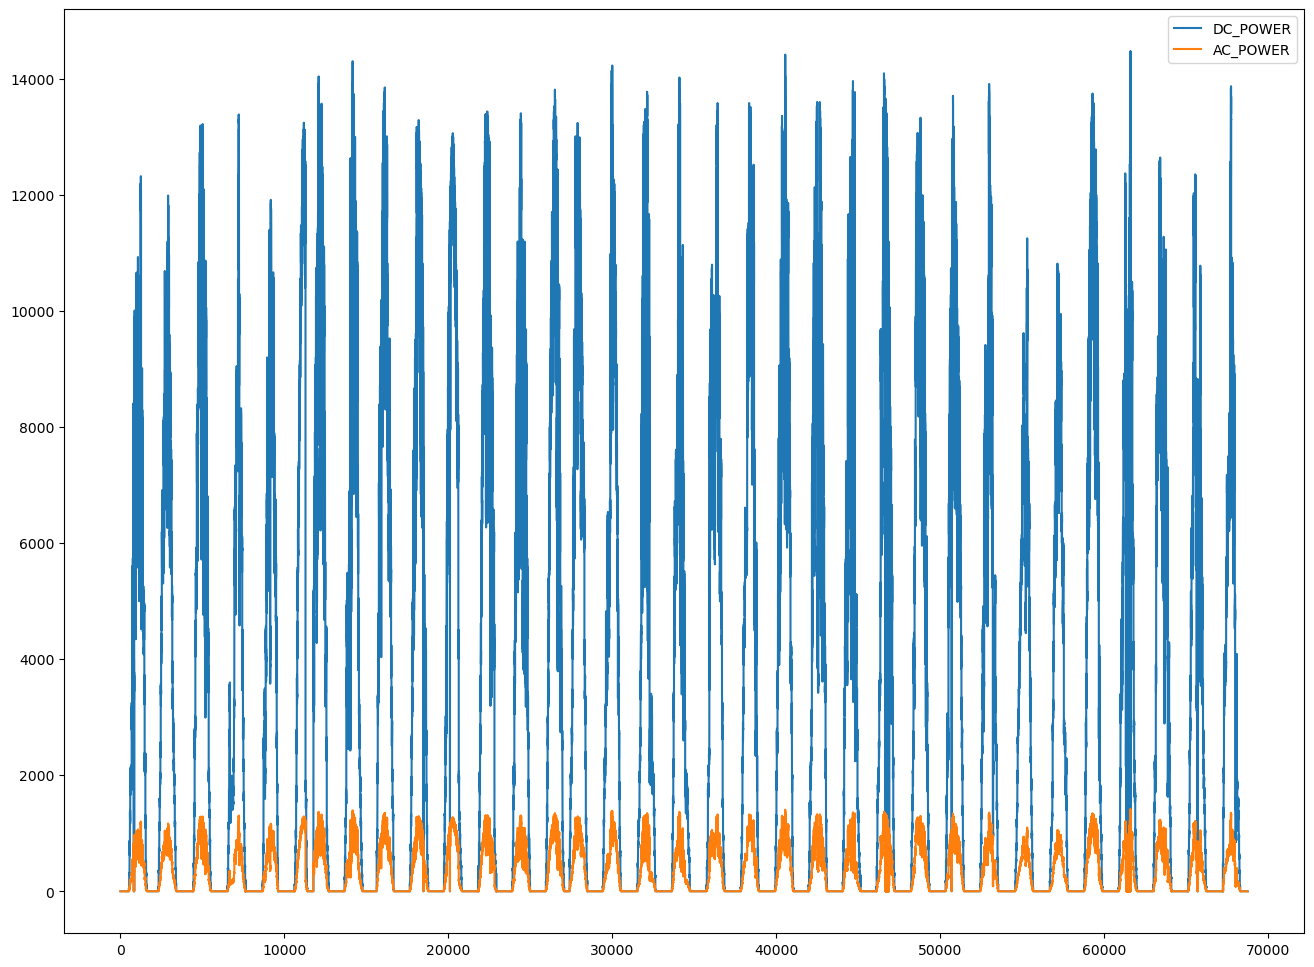

In [18]:
p1g[['DC_POWER','AC_POWER']].plot(figsize = (16,12));

La diferencia es muy grande.

Primero vamos a comprobar si van en la misma dirección aunque sea a disinta escala (con una correlación), y después vamos a comprobar cual es el ratio medio entre ambas medidas.

In [19]:
p1g.DC_POWER.corr(p1g.AC_POWER)

0.9999962553331404

In [20]:
(p1g.DC_POWER / p1g.AC_POWER).describe()

count          36827.00
mean              10.23
std                0.05
min                9.38
25%               10.20
50%               10.22
75%               10.25
max               10.47
dtype: float64

Parece que los Inverters están transformando solo el 10% de DC a AC, lo cual a priori es muy bajo.

De todas formas desde la calidad llegamos hasta aquí y seguiremos explorando esto en la parte de análisis y comparándolo con la Planta 2 a ver si pasa lo mismo.

Analizamos la variable categórica, que es el identificador de los inverters.

In [21]:
p1g.SOURCE_KEY.nunique()

22

In [22]:
p1g.SOURCE_KEY.value_counts()

SOURCE_KEY
bvBOhCH3iADSZry    3155
1BY6WEcLGh8j5v7    3154
7JYdWkrLSPkdwr4    3133
VHMLBKoKgIrUVDU    3133
ZnxXDlPa8U1GXgE    3130
ih0vzX44oOqAx2f    3130
z9Y9gH1T5YWrNuG    3126
wCURE6d3bPkepu2    3126
uHbuxQJl8lW7ozc    3125
pkci93gMrogZuBj    3125
iCRJl6heRkivqQ3    3125
rGa61gmuvPhdLxV    3124
sjndEbLyjtCKgGv    3124
McdE0feGgRqW7Ca    3124
zVJPv84UY57bAof    3124
ZoEaEvLYb1n2sOq    3123
1IF53ai7Xc0U56Y    3119
adLQvlD726eNBSB    3119
zBIq5rxdHJRwDNY    3119
WRmjgnKYAwPKWDb    3118
3PZuoBAID5Wc2HD    3118
YxYtjZvoooNbGkE    3104
Name: count, dtype: int64

Conclusiones:

    * La planta 1 tiene 22 inverters
    * Todos tienen un número similar de medidas aunque no exactamente igual
    * Podrían ser paradas por mantenimientos, o simples pérdidas de datos pero lo apuntamos para la fase de análisis

Vamos a analizar las variables DAILY_YIELD, ya que los metadatos nos dicen que la variable TOTAL_YIELD es el total acumulado **por inverter**, pero en DAILY_YIELD no lo especifica, por lo que no sabemos si es un acumulado por inverter o por planta.

La hipótesis es la siguiente: si es por planta no debería haber diferencias entre el dato de los diferentes inverters en el mismo momento puntual.

Y por consiguiente si vemos que sí hay diferencias entonces es que el dato es por inverter.

Para comprobarlo nos sirve con coger una muestra de inverters.

In [23]:
seleccion = list(p1g.SOURCE_KEY.unique()[:5])

In [24]:
temp = p1g[p1g.SOURCE_KEY.isin(seleccion)].set_index('DATE_TIME')
temp

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,,
2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00
2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00
2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00
2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00
2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00
...,...,...,...,...,...,...
2020-06-17 23:45:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,5521.00,6485319.00
2020-06-17 23:45:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,6034.00,6433566.00
2020-06-17 23:45:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,6052.00,7237425.00


En los datos ya vemos que es diferente, pero vamos a comprobar sobre más datos para que no sea un efecto de esos registros en concreto.

Vamos a verlo gráficamente, y por simplificar vamos a coger solo una muestra de días.

Como tenemos la fecha como index recordamos que podemos usar indexación parcial y slice.

In [25]:
temp = temp.loc['2020-06-01':'2020-06-05']
temp

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,,
2020-06-01 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,829.00,6377931.00
2020-06-01 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6311432.00
2020-06-01 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,7115304.00
2020-06-01 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,730.38,7727821.00
2020-06-01 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7286760.00
...,...,...,...,...,...,...
2020-06-05 23:45:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,7162.00,6412542.00
2020-06-05 23:45:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6348557.00
2020-06-05 23:45:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,7152486.00


C:\Users\jorge\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jorge\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


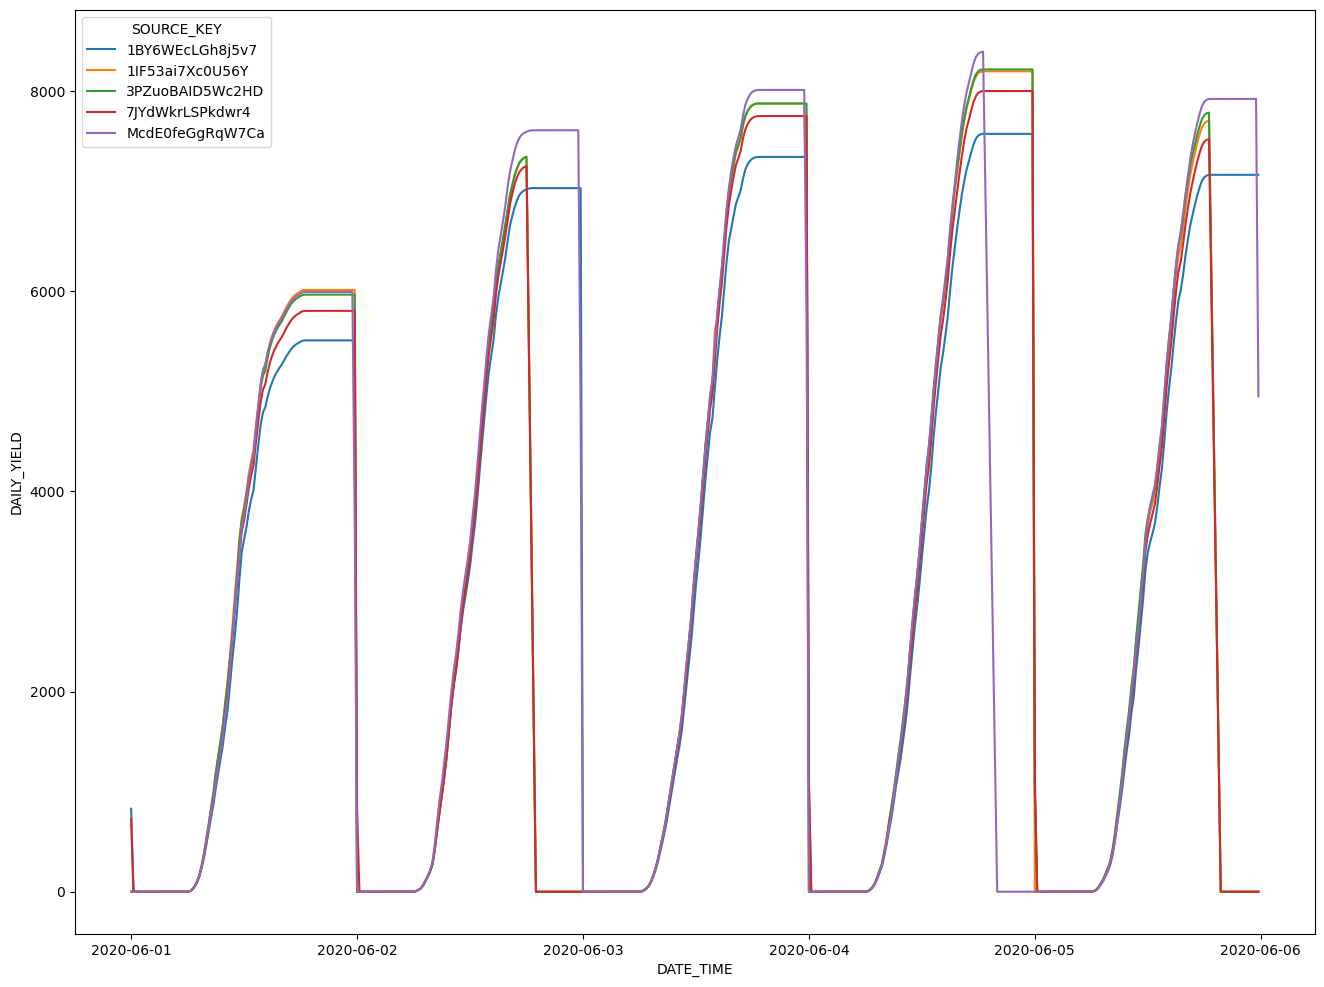

In [27]:
plt.figure(figsize = (16,12))
sns.lineplot(data = temp.reset_index(), x = temp.reset_index().DATE_TIME, y = 'DAILY_YIELD', hue = 'SOURCE_KEY');

Definitivamente diferentes inverters tienen diferentes datos en el mismo momento temporal, por lo que concluímos que esa variable es **por inverter**

Por último vamos a analizar el período en el que tenemos datos y si el número de mediciones diarias es constante.

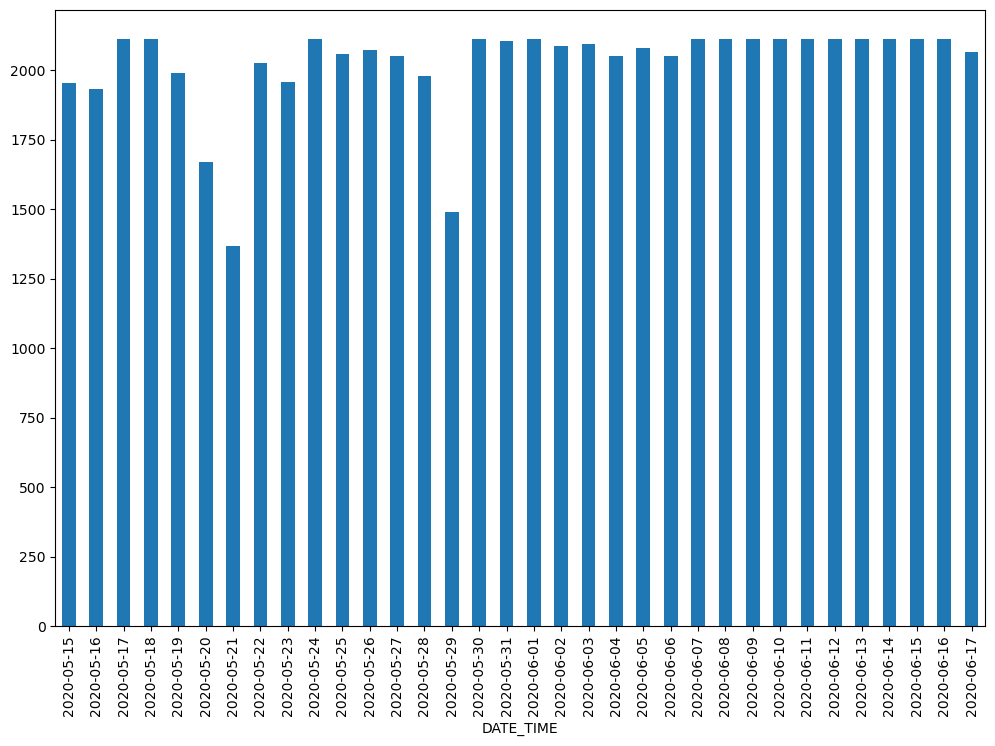

In [28]:
p1g.DATE_TIME.dt.date.value_counts().sort_index().plot.bar(figsize = (12,8));

Conclusiones:

    * El período de datos es entre el 15 de Mayo del 2020 y el 17 de Junio de 2020
    * Tenemos datos para todos los días, no falta ninguno intermedio
    * Pero algunos días como el 21/05 o el 29/05 tienen menos mediciones
    * Por lo que no parece 100% regular

### Calidad de datos planta 1 - datos de sensor ambiental

In [29]:
p1w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


Corregimos el tipo de DATE_TIME

In [30]:
p1w.DATE_TIME = pd.to_datetime(p1w.DATE_TIME)
p1w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime64[ns]
 1   PLANT_ID             3182 non-null   int64         
 2   SOURCE_KEY           3182 non-null   object        
 3   AMBIENT_TEMPERATURE  3182 non-null   float64       
 4   MODULE_TEMPERATURE   3182 non-null   float64       
 5   IRRADIATION          3182 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 149.3+ KB


In [31]:
p1w.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.08,22.76,0.00
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.94,22.59,0.00
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.85,22.36,0.00
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.62,22.17,0.00


Reemplazamos el nombre de la planta.

In [32]:
p1w['PLANT_ID'] = p1w.PLANT_ID.replace(4135001,'p1')
p1w

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,p1,HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:15:00,p1,HmiyD2TTLFNqkNe,25.08,22.76,0.00
2,2020-05-15 00:30:00,p1,HmiyD2TTLFNqkNe,24.94,22.59,0.00
3,2020-05-15 00:45:00,p1,HmiyD2TTLFNqkNe,24.85,22.36,0.00
4,2020-05-15 01:00:00,p1,HmiyD2TTLFNqkNe,24.62,22.17,0.00
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,p1,HmiyD2TTLFNqkNe,22.15,21.48,0.00
3178,2020-06-17 23:00:00,p1,HmiyD2TTLFNqkNe,22.13,21.39,0.00
3179,2020-06-17 23:15:00,p1,HmiyD2TTLFNqkNe,22.01,20.71,0.00
3180,2020-06-17 23:30:00,p1,HmiyD2TTLFNqkNe,21.97,20.73,0.00


Revisamos los estadísticos.

In [33]:
p1w.describe().T

,count,mean,min,25%,50%,75%,max,std
DATE_TIME,3182,2020-06-01 05:52:22.080452608,2020-05-15 00:00:00,2020-05-23 22:48:45,2020-06-01 09:52:30,2020-06-09 16:56:15,2020-06-17 23:45:00,NaN
AMBIENT_TEMPERATURE,3182.00,25.53,20.40,22.71,24.61,27.92,35.25,3.35
MODULE_TEMPERATURE,3182.00,31.09,18.14,21.09,24.62,41.31,65.55,12.26
IRRADIATION,3182.00,0.23,0.00,0.00,0.02,0.45,1.22,0.30


Revisamos la variable categórica, que es el identificador del sensor.

In [34]:
p1w.SOURCE_KEY.nunique()

1

Solo hay un sensor de variables ambientales en la planta.

Revisamos la fecha.

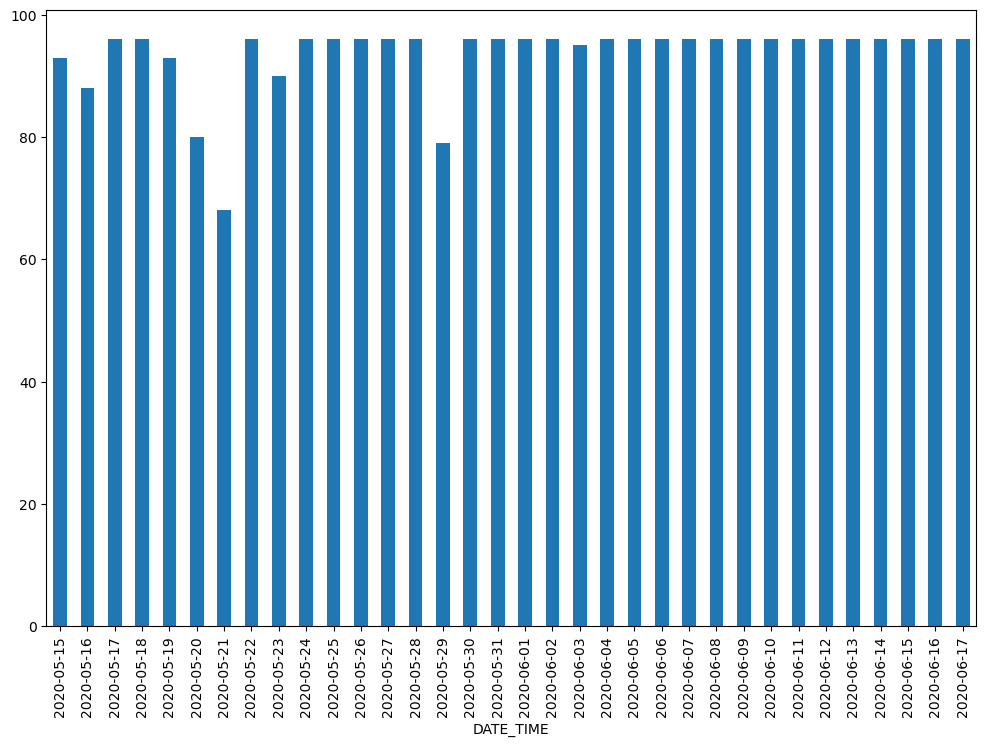

In [35]:
p1w.DATE_TIME.dt.date.value_counts().sort_index().plot.bar(figsize = (12,8));

Conclusiones:

    * El período de datos es entre el 15 de Mayo del 2020 y el 17 de Junio de 2020
    * Tenemos datos para todos los días, no falta ninguno intermedio
    * Pero algunos días como el 21/05 o el 29/05 tienen menos mediciones
    * Por lo que no parece 100% regular

### Calidad de planta 2 - datos de generación

In [36]:
p2g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


In [37]:
p2g['DATE_TIME'] = pd.to_datetime(p2g.DATE_TIME)

In [38]:
p2g['PLANT_ID'] = p2g.PLANT_ID.replace(4136001, 'p2')

In [39]:
p2g.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,p2,4UPUqMRk7TRMgml,0.00,0.00,9425.00,2429011.00
1,2020-05-15,p2,81aHJ1q11NBPMrL,0.00,0.00,0.00,1215278736.00
2,2020-05-15,p2,9kRcWv60rDACzjR,0.00,0.00,3075.33,2247719577.00
3,2020-05-15,p2,Et9kgGMDl729KT4,0.00,0.00,269.93,1704250.00
4,2020-05-15,p2,IQ2d7wF4YD8zU1Q,0.00,0.00,3177.00,19941526.00


In [40]:
p2g.describe().T

,count,mean,min,25%,50%,75%,max,std
DATE_TIME,67698,2020-06-01 10:44:33.650625024,2020-05-15 00:00:00,2020-05-23 21:00:00,2020-06-01 23:00:00,2020-06-09 23:30:00,2020-06-17 23:45:00,NaN
DC_POWER,67698.00,246.70,0.00,0.00,0.00,446.59,1420.93,370.57
AC_POWER,67698.00,241.28,0.00,0.00,0.00,438.22,1385.42,362.11
DAILY_YIELD,67698.00,3294.89,0.00,272.75,2911.00,5534.00,9873.00,2919.45
TOTAL_YIELD,67698.00,658944788.42,0.00,19964944.87,282627587.00,1348495113.00,2247916295.00,729667771.07


En este caso los valores de DC y AC están mucho más cercanos entre sí.

Vamos a calcular el ratio.

In [41]:
(p2g.DC_POWER / p2g.AC_POWER).describe()

count          32036.00
mean               1.02
std                0.01
min                0.99
25%                1.02
50%                1.02
75%                1.03
max                1.10
dtype: float64

Ahora los valores del ratio sí están muy próximos a uno.

Analizamos la variable categórica, que es el identificador de los inverters.

In [42]:
p2g.SOURCE_KEY.nunique()

22

In [43]:
p2g.SOURCE_KEY.value_counts()

SOURCE_KEY
xoJJ8DcxJEcupym    3259
WcxssY2VbP4hApt    3259
9kRcWv60rDACzjR    3259
vOuJvMaM2sgwLmb    3259
rrq4fwE8jgrTyWY    3259
LYwnQax7tkwH5Cb    3259
LlT2YUhhzqhg5Sw    3259
q49J1IKaHRwDQnt    3259
oZZkBaNadn6DNKz    3259
PeE6FRyGXUgsRhN    3259
81aHJ1q11NBPMrL    3259
V94E5Ben1TlhnDV    3259
oZ35aAeoifZaQzV    3195
4UPUqMRk7TRMgml    3195
Qf4GUc1pJu5T6c6    3195
Mx2yZCDsyf6DPfv    3195
Et9kgGMDl729KT4    3195
Quc1TzYxW2pYoWX    3195
mqwcsP2rE7J0TFp    2355
NgDl19wMapZy17u    2355
IQ2d7wF4YD8zU1Q    2355
xMbIugepa2P7lBB    2355
Name: count, dtype: int64

Conclusiones:

    * La planta 2 tiene 22 inverters
    * Todos tienen un número similar de medidas aunque no exactamente igual
    * A excepción de 4 que tienen unas 800 medidas menos
    * Lo apuntamos para la fase de análisis

Por último vamos a analizar la fecha.

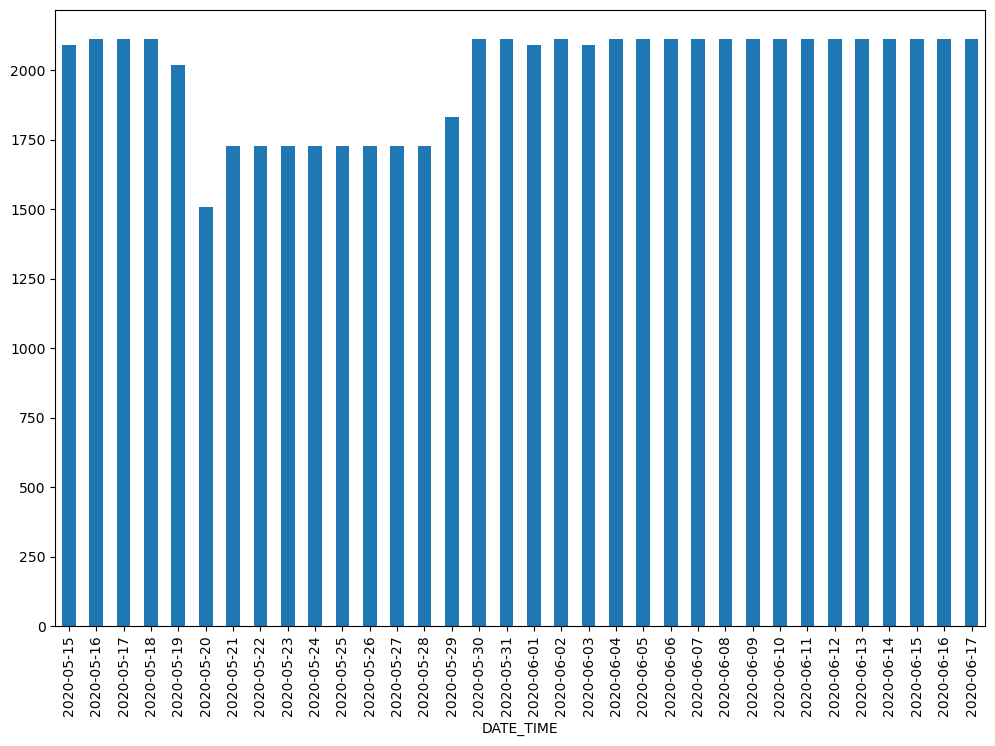

In [44]:
p2g.DATE_TIME.dt.date.value_counts().sort_index().plot.bar(figsize = (12,8));

Conclusiones:

    * El período de datos es entre el 15 de Mayo del 2020 y el 17 de Junio de 2020
    * Tenemos datos para todos los días, no falta ninguno intermedio
    * Pero algunos días como el 20/05 y varios más tienen menos mediciones
    * Por lo que no parece 100% regular

### Calidad de datos planta 2 - datos de sensor ambiental

In [45]:
p2w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB


Corregimos el tipo de DATE_TIME

In [46]:
p2w.DATE_TIME = pd.to_datetime(p2w.DATE_TIME)
p2w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3259 non-null   datetime64[ns]
 1   PLANT_ID             3259 non-null   int64         
 2   SOURCE_KEY           3259 non-null   object        
 3   AMBIENT_TEMPERATURE  3259 non-null   float64       
 4   MODULE_TEMPERATURE   3259 non-null   float64       
 5   IRRADIATION          3259 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 152.9+ KB


In [47]:
p2w.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.00,25.06,0.00
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.88,24.42,0.00
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.68,24.43,0.00
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.50,24.42,0.00
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.60,25.09,0.00


Reemplazamos el nombre de la planta.

In [48]:
p2w['PLANT_ID'] = p2w.PLANT_ID.replace(4136001,'p2')
p2w

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,p2,iq8k7ZNt4Mwm3w0,27.00,25.06,0.00
1,2020-05-15 00:15:00,p2,iq8k7ZNt4Mwm3w0,26.88,24.42,0.00
2,2020-05-15 00:30:00,p2,iq8k7ZNt4Mwm3w0,26.68,24.43,0.00
3,2020-05-15 00:45:00,p2,iq8k7ZNt4Mwm3w0,26.50,24.42,0.00
4,2020-05-15 01:00:00,p2,iq8k7ZNt4Mwm3w0,26.60,25.09,0.00
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,p2,iq8k7ZNt4Mwm3w0,23.51,22.86,0.00
3255,2020-06-17 23:00:00,p2,iq8k7ZNt4Mwm3w0,23.48,22.74,0.00
3256,2020-06-17 23:15:00,p2,iq8k7ZNt4Mwm3w0,23.35,22.49,0.00
3257,2020-06-17 23:30:00,p2,iq8k7ZNt4Mwm3w0,23.29,22.37,0.00


Revisamos los estadísticos.

In [49]:
p2w.describe().T

,count,mean,min,25%,50%,75%,max,std
DATE_TIME,3259,2020-06-01 00:04:35.053697536,2020-05-15 00:00:00,2020-05-23 12:07:30,2020-06-01 00:00:00,2020-06-09 12:07:30,2020-06-17 23:45:00,NaN
AMBIENT_TEMPERATURE,3259.00,28.07,20.94,24.60,26.98,31.06,39.18,4.06
MODULE_TEMPERATURE,3259.00,32.77,20.27,23.72,27.53,40.48,66.64,11.34
IRRADIATION,3259.00,0.23,0.00,0.00,0.02,0.44,1.10,0.31


Analizamos la variable categórica, que es el identificador del sensor.

In [50]:
p2w.SOURCE_KEY.nunique()

1

Solo hay un sensor de variables ambientales en la planta.

Revisamos la fecha.

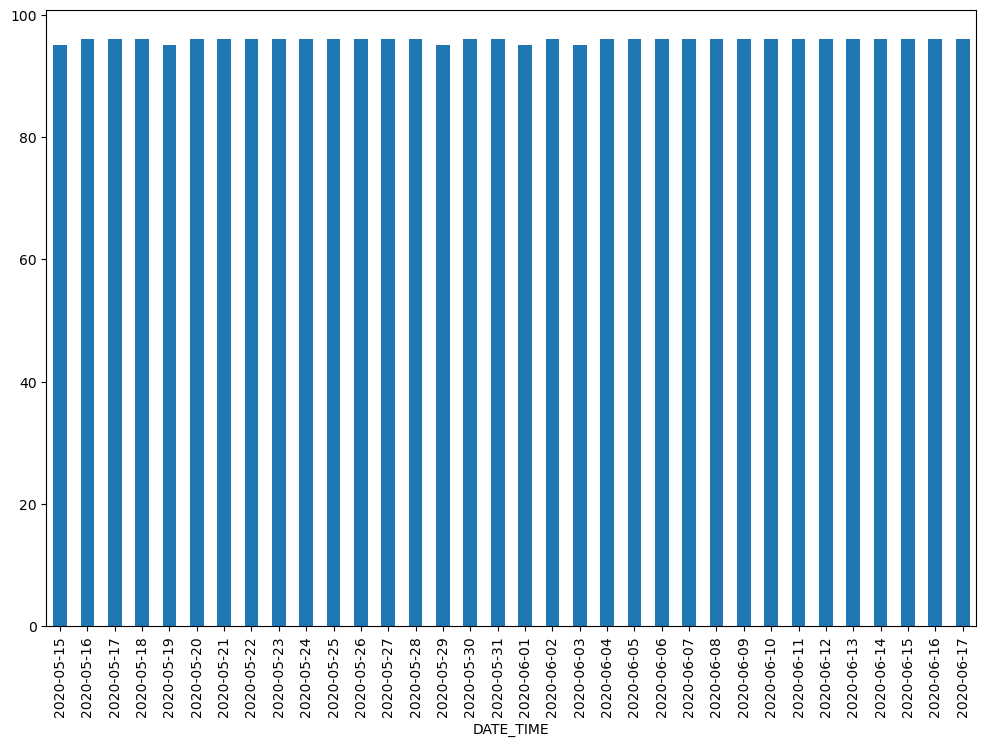

In [51]:
p2w.DATE_TIME.dt.date.value_counts().sort_index().plot.bar(figsize = (12,8));

Conclusiones:

    * El período de datos es entre el 15 de Mayo del 2020 y el 17 de Junio de 2020
    * Tenemos datos para todos los días, no falta ninguno intermedio
    * Pero algunos días como el 15/05 u otros tienen menos mediciones, aunque faltan mucho menos que en los otros datasets
    * Pero no parece 100% regular

### Temas pendientes de la calidad de datos para analizar posteriormente

* En la planta 1 parece que los Inverters están transformando solo el 10% de DC a AC, lo cual a priori es muy bajo.
* En la planta 2 el ratio es mucho más cercano a 1.
* Los intervalos de medida no son 100% regulares. Hay días con menos medidas, y hay también diferencias por inverters.


## CREACIÓN DEL DATAMART ANALITICO

Vamos a hacer una unión por partes.

Primero los dos datasets de generación. Que será una apilación de registros ya que los campos son iguales.

Después los dos de medidas ambientales. Que será una apilación de registros ya que los campos son iguales.

Y por último cruzaremos ambos parciales mediante la integración por campos clave.

### Unión de los datasets de generación

In [52]:
gener = pd.concat([p1g,p2g],axis = 'index')
gener

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00
1,2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00
2,2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00
3,2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00
4,2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00
67694,2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00
67695,2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00
67696,2020-06-17 23:45:00,p2,xMbIugepa2P7lBB,0.00,0.00,4218.00,106896394.00


Vamos a renombrar ya las variables para hacerlas más descriptivas y usables.

In [53]:
gener.columns = ['fecha','planta','inverter_id','kw_dc','kw_ac','kw_dia','kw_total']
gener

,fecha,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total
0,2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00
1,2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00
2,2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00
3,2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00
4,2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00
67694,2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00
67695,2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00
67696,2020-06-17 23:45:00,p2,xMbIugepa2P7lBB,0.00,0.00,4218.00,106896394.00


Ahora que tenemos las 2 plantas unidas vamos a hacer lo que se llama un análisis de coherencia, dado que según la documentación kw_dia y kw_total están directamente relacionados con kw_dc y kw_ac.

Vamos a intentar replicar los datos de kw_dia y kw_total.

In [54]:
gener2 = gener.copy()

Creamos una variable date para poder agregar por ella.

In [55]:
gener2['date'] = gener2.fecha.dt.date
gener2

,fecha,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,date
0,2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,2020-05-15
1,2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,2020-05-15
2,2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,2020-05-15
3,2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,2020-05-15
4,2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,2020-05-15
...,...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,2020-06-17
67694,2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,2020-06-17
67695,2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,2020-06-17
67696,2020-06-17 23:45:00,p2,xMbIugepa2P7lBB,0.00,0.00,4218.00,106896394.00,2020-06-17


La suma por planta, date e inverter de kw_dc o de kw_ac debería coincidir con el máximo de kw_dia.

In [58]:
gener2 = gener2.groupby(['planta','date','inverter_id']).agg({'kw_dc':'sum',
                                                              'kw_ac':'sum',
                                                              'kw_dia':'max',
                                                              'kw_total':'max'}).reset_index()
gener2

,planta,date,inverter_id,kw_dc,kw_ac,kw_dia,kw_total
0,p1,2020-05-15,1BY6WEcLGh8j5v7,235340.70,23046.55,5754.00,6265313.00
1,p1,2020-05-15,1IF53ai7Xc0U56Y,258911.11,25343.29,6357.00,6190002.00
2,p1,2020-05-15,3PZuoBAID5Wc2HD,254766.05,24937.70,6274.00,6994033.00
3,p1,2020-05-15,7JYdWkrLSPkdwr4,250608.34,24533.91,6116.00,7609076.00
4,p1,2020-05-15,McdE0feGgRqW7Ca,264030.98,25840.63,6471.00,7165435.00
...,...,...,...,...,...,...,...
1459,p2,2020-06-17,q49J1IKaHRwDQnt,17001.51,16655.15,4157.00,520758.00
1460,p2,2020-06-17,rrq4fwE8jgrTyWY,16073.93,15748.92,3931.00,121131356.00
1461,p2,2020-06-17,vOuJvMaM2sgwLmb,17710.00,17345.44,4322.00,2427691.00
1462,p2,2020-06-17,xMbIugepa2P7lBB,17211.23,16860.38,5502.00,106896394.00


Ordenamos para poder analizar.

In [59]:
gener2 = gener2.sort_values(['planta','inverter_id','date'])
gener2

,planta,date,inverter_id,kw_dc,kw_ac,kw_dia,kw_total
0,p1,2020-05-15,1BY6WEcLGh8j5v7,235340.70,23046.55,5754.00,6265313.00
22,p1,2020-05-16,1BY6WEcLGh8j5v7,256629.88,25124.49,6292.00,6271605.00
44,p1,2020-05-17,1BY6WEcLGh8j5v7,288039.82,28172.85,7045.00,6278650.00
66,p1,2020-05-18,1BY6WEcLGh8j5v7,204030.30,19970.51,4998.00,6283648.00
88,p1,2020-05-19,1BY6WEcLGh8j5v7,232277.27,22741.18,6449.00,6290097.00
...,...,...,...,...,...,...,...
1375,p2,2020-06-13,xoJJ8DcxJEcupym,27443.74,26840.58,6632.00,209312200.00
1397,p2,2020-06-14,xoJJ8DcxJEcupym,30768.78,30088.97,7268.00,209319687.00
1419,p2,2020-06-15,xoJJ8DcxJEcupym,25597.24,25049.49,7412.67,209325949.00
1441,p2,2020-06-16,xoJJ8DcxJEcupym,22335.69,21870.63,6203.20,209331425.00


Kw_dia no concuerda para nada ni con kw_dc ni con kw_ac.

Vamos a ver si concuerda con kw_total, para ello calculamos el incremento diario de kw_total que debería coincidir con el máximo de kw_dia del día anterior.

In [60]:
gener2['lag1'] = gener2.groupby(['planta','inverter_id']).kw_total.shift(1)
gener2['incremento'] = gener2.kw_total - gener2.lag1
gener2

,planta,date,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,lag1,incremento
0,p1,2020-05-15,1BY6WEcLGh8j5v7,235340.70,23046.55,5754.00,6265313.00,NaN,NaN
22,p1,2020-05-16,1BY6WEcLGh8j5v7,256629.88,25124.49,6292.00,6271605.00,6265313.00,6292.00
44,p1,2020-05-17,1BY6WEcLGh8j5v7,288039.82,28172.85,7045.00,6278650.00,6271605.00,7045.00
66,p1,2020-05-18,1BY6WEcLGh8j5v7,204030.30,19970.51,4998.00,6283648.00,6278650.00,4998.00
88,p1,2020-05-19,1BY6WEcLGh8j5v7,232277.27,22741.18,6449.00,6290097.00,6283648.00,6449.00
...,...,...,...,...,...,...,...,...,...
1375,p2,2020-06-13,xoJJ8DcxJEcupym,27443.74,26840.58,6632.00,209312200.00,209305520.00,6680.00
1397,p2,2020-06-14,xoJJ8DcxJEcupym,30768.78,30088.97,7268.00,209319687.00,209312200.00,7487.00
1419,p2,2020-06-15,xoJJ8DcxJEcupym,25597.24,25049.49,7412.67,209325949.00,209319687.00,6262.00
1441,p2,2020-06-16,xoJJ8DcxJEcupym,22335.69,21870.63,6203.20,209331425.00,209325949.00,5476.00


Comprobamos en la planta 1.

In [61]:
gener2[gener2.planta == 'p1'].head(50)

,planta,date,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,lag1,incremento
0,p1,2020-05-15,1BY6WEcLGh8j5v7,235340.70,23046.55,5754.00,6265313.00,NaN,NaN
22,p1,2020-05-16,1BY6WEcLGh8j5v7,256629.88,25124.49,6292.00,6271605.00,6265313.00,6292.00
44,p1,2020-05-17,1BY6WEcLGh8j5v7,288039.82,28172.85,7045.00,6278650.00,6271605.00,7045.00
66,p1,2020-05-18,1BY6WEcLGh8j5v7,204030.30,19970.51,4998.00,6283648.00,6278650.00,4998.00
88,p1,2020-05-19,1BY6WEcLGh8j5v7,232277.27,22741.18,6449.00,6290097.00,6283648.00,6449.00
110,p1,2020-05-20,1BY6WEcLGh8j5v7,230412.62,22516.26,8249.00,6298346.00,6290097.00,8249.00
132,p1,2020-05-21,1BY6WEcLGh8j5v7,288676.60,28223.13,7243.00,6305589.00,6298346.00,7243.00
154,p1,2020-05-22,1BY6WEcLGh8j5v7,280809.07,27456.63,6848.00,6312437.00,6305589.00,6848.00
176,p1,2020-05-23,1BY6WEcLGh8j5v7,326468.27,31922.93,7966.00,6320403.00,6312437.00,7966.00
198,p1,2020-05-24,1BY6WEcLGh8j5v7,309111.73,30220.37,7537.00,6327940.00,6320403.00,7537.00


Comprobamos en la planta 2.

In [62]:
gener2[gener2.planta == 'p2'].head(50)

,planta,date,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,lag1,incremento
748,p2,2020-05-15,4UPUqMRk7TRMgml,17112.65,16744.08,9425.00,2433212.00,NaN,NaN
770,p2,2020-05-16,4UPUqMRk7TRMgml,23305.45,22791.22,5677.00,2438889.00,2433212.00,5677.00
792,p2,2020-05-17,4UPUqMRk7TRMgml,25985.95,25430.42,6342.00,2445231.00,2438889.00,6342.00
814,p2,2020-05-18,4UPUqMRk7TRMgml,31218.58,30516.03,7641.00,2452872.00,2445231.00,7641.00
836,p2,2020-05-19,4UPUqMRk7TRMgml,8040.00,7878.39,7641.00,2454841.00,2452872.00,1969.00
858,p2,2020-05-20,4UPUqMRk7TRMgml,9852.13,9641.35,9423.00,2464264.00,2454841.00,9423.00
880,p2,2020-05-21,4UPUqMRk7TRMgml,37403.77,36540.63,9423.00,2473415.00,2464264.00,9151.00
898,p2,2020-05-22,4UPUqMRk7TRMgml,40414.35,39472.14,9863.00,2483278.00,2473415.00,9863.00
916,p2,2020-05-23,4UPUqMRk7TRMgml,39690.66,38769.69,9863.00,2492966.00,2483278.00,9688.00
934,p2,2020-05-24,4UPUqMRk7TRMgml,18963.72,18558.18,9688.00,2497601.00,2492966.00,4635.00


Conclusiones:
* kw_dia tiene coherencia con kw_total
* pero éstas no tienen coherencia con kw_dc ni con kw_ac
* es como si estuvieran en diferentes unidades o hubiera algún cálculo del que no somos conscientes
* por tanto tendremos 2 bloques a poder usar: o bien kw_dc con kw_ac, o bien kw_dia con kw_total, pero no podemos mezclarlas entre sí

### Unión de los datasets de mediciones ambientales

In [63]:
temper = pd.concat([p1w,p2w], axis = 'index')
temper

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,p1,HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:15:00,p1,HmiyD2TTLFNqkNe,25.08,22.76,0.00
2,2020-05-15 00:30:00,p1,HmiyD2TTLFNqkNe,24.94,22.59,0.00
3,2020-05-15 00:45:00,p1,HmiyD2TTLFNqkNe,24.85,22.36,0.00
4,2020-05-15 01:00:00,p1,HmiyD2TTLFNqkNe,24.62,22.17,0.00
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,p2,iq8k7ZNt4Mwm3w0,23.51,22.86,0.00
3255,2020-06-17 23:00:00,p2,iq8k7ZNt4Mwm3w0,23.48,22.74,0.00
3256,2020-06-17 23:15:00,p2,iq8k7ZNt4Mwm3w0,23.35,22.49,0.00
3257,2020-06-17 23:30:00,p2,iq8k7ZNt4Mwm3w0,23.29,22.37,0.00


Vamos a renombrar ya las variables para hacerlas más descriptivas y usables.

In [64]:
temper.columns = ['fecha','planta','sensor_id','t_ambiente','t_modulo','irradiacion']
temper

,fecha,planta,sensor_id,t_ambiente,t_modulo,irradiacion
0,2020-05-15 00:00:00,p1,HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:15:00,p1,HmiyD2TTLFNqkNe,25.08,22.76,0.00
2,2020-05-15 00:30:00,p1,HmiyD2TTLFNqkNe,24.94,22.59,0.00
3,2020-05-15 00:45:00,p1,HmiyD2TTLFNqkNe,24.85,22.36,0.00
4,2020-05-15 01:00:00,p1,HmiyD2TTLFNqkNe,24.62,22.17,0.00
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,p2,iq8k7ZNt4Mwm3w0,23.51,22.86,0.00
3255,2020-06-17 23:00:00,p2,iq8k7ZNt4Mwm3w0,23.48,22.74,0.00
3256,2020-06-17 23:15:00,p2,iq8k7ZNt4Mwm3w0,23.35,22.49,0.00
3257,2020-06-17 23:30:00,p2,iq8k7ZNt4Mwm3w0,23.29,22.37,0.00


### Creación del datamart analitico

En este caso el campo clave es compuesto de fecha y planta y manda el dataset de generación, ya que el de temperatura solo nos aporta variables adicionales.

In [65]:
df = pd.merge(left = gener, right = temper, how = 'left', on = ['fecha','planta'])
df

,fecha,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,sensor_id,t_ambiente,t_modulo,irradiacion
0,2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2,2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
3,2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
4,2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
...,...,...,...,...,...,...,...,...,...,...,...
136471,2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
136472,2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
136473,2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
136474,2020-06-17 23:45:00,p2,xMbIugepa2P7lBB,0.00,0.00,4218.00,106896394.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00


Tras una integración siempre es conveniente comprobar si se han generado nulos.

In [66]:
df.isna().sum()

fecha          0
planta         0
inverter_id    0
kw_dc          0
kw_ac          0
kw_dia         0
kw_total       0
sensor_id      4
t_ambiente     4
t_modulo       4
irradiacion    4
dtype: int64

Buscamos si los nulos cumplen algún patrón.

In [67]:
nulos = df[df.sensor_id.isna()]
nulos

,fecha,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,sensor_id,t_ambiente,t_modulo,irradiacion
38544,2020-06-03 14:00:00,p1,1IF53ai7Xc0U56Y,7003.00,685.80,5601.00,6330385.00,NaN,NaN,NaN,NaN
38545,2020-06-03 14:00:00,p1,adLQvlD726eNBSB,7204.00,705.40,5685.00,6419961.00,NaN,NaN,NaN,NaN
38546,2020-06-03 14:00:00,p1,wCURE6d3bPkepu2,7545.00,738.70,5579.00,6928448.00,NaN,NaN,NaN,NaN
38547,2020-06-03 14:00:00,p1,z9Y9gH1T5YWrNuG,7946.00,777.80,5541.00,7152815.00,NaN,NaN,NaN,NaN


Se trata del día 3 de Junio a las 14:00, que por algún motivo no tiene datos de temperatura pero solo para 4 inverters de la planta 1.

Vamos a buscar en el dataset de temperatura si existe ese datetime.

In [68]:
temper[temper.fecha.between('2020-06-03 13:30:00', '2020-06-03 14:30:00')]

,fecha,planta,sensor_id,t_ambiente,t_modulo,irradiacion
1797,2020-06-03 13:30:00,p1,HmiyD2TTLFNqkNe,28.56,48.78,0.75
1798,2020-06-03 13:45:00,p1,HmiyD2TTLFNqkNe,27.86,46.63,0.62
1799,2020-06-03 14:15:00,p1,HmiyD2TTLFNqkNe,28.36,50.63,0.72
1800,2020-06-03 14:30:00,p1,HmiyD2TTLFNqkNe,28.31,47.38,0.67
1874,2020-06-03 13:30:00,p2,iq8k7ZNt4Mwm3w0,28.60,37.68,0.41
1875,2020-06-03 13:45:00,p2,iq8k7ZNt4Mwm3w0,28.75,36.35,0.35
1876,2020-06-03 14:15:00,p2,iq8k7ZNt4Mwm3w0,30.45,45.63,0.76
1877,2020-06-03 14:30:00,p2,iq8k7ZNt4Mwm3w0,29.64,40.40,0.44


Efectivamente vemos que falta ese tramo en ambas plantas. Pero sin embargo solo hay mediciones en esa hora en la planta 1, y solo en 4 inverters.

Por tanto habría dos soluciones:

* imputar esos datos para esos invertes
* eliminar esos 4 registros

Dado que parece una franja de medición propia solo de 4 inverters de la planta 1 vamos a optar por eliminarlos.

In [69]:
df.dropna(inplace = True)
df

,fecha,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,sensor_id,t_ambiente,t_modulo,irradiacion
0,2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2,2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
3,2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
4,2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
...,...,...,...,...,...,...,...,...,...,...,...
136471,2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
136472,2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
136473,2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
136474,2020-06-17 23:45:00,p2,xMbIugepa2P7lBB,0.00,0.00,4218.00,106896394.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00


In [70]:
df.set_index('fecha', inplace = True)
df

,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,sensor_id,t_ambiente,t_modulo,irradiacion
fecha,,,,,,,,,,
2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00


## GUARDAMOS EL DATAMART

Guardamos el Datamart en formato .pickle


In [71]:
df.to_pickle('../Datos/df.pickle')